In [1]:
import pandas as pd
import numpy as np
from nilmtk import DataSet

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
from nilmtk.disaggregate import Hart85

In [3]:
from nilmtk.feature_detectors.steady_states import find_steady_states, find_steady_states_transients

In [4]:
ds = DataSet("/Users/nipunbatra/wikienergy-2013.h5")

In [5]:
len(ds.buildings)

66

In [34]:
to_consider = []
b_id, building = ds.buildings.items()[13]
elec = building.elec
mains = elec.mains()
N=500
df = mains.load().next().head(N)
ac_df = elec['air conditioner'].load().next().head(N)

In [35]:
steady_states, edges_df = find_steady_states(df,  min_n_samples=10,noise_level=15, state_threshold=20)

Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


In [36]:
%matplotlib qt

In [37]:
ax = df.plot()
ac_df.plot(ax=ax)
steady_states.plot(ax=ax, style='ro')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113d605d0>]], dtype=object)

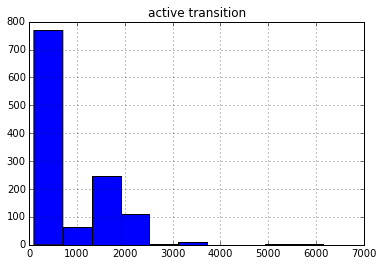

In [14]:
edges_df[edges_df>100].hist()

In [75]:
h.train(building.elec.mains())

Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


In [76]:
h.centroids

,"(power, active)"
0,2358.979232
1,140.919346
2,3509.416667
3,3283.250000
4,908.437500
5,3887.208333
6,1788.325000


In [77]:
df = building.elec['air conditioner'].load().next()[('power','active')]
df[df>100].describe()

count    13154.000000
mean      1856.449341
std        498.694580
min        102.000000
25%       1763.000000
50%       1983.000000
75%       2160.000000
max       2683.000000
Name: (power, active), dtype: float64

In [11]:
s.keys()[0]

'/building9/elec/meter1'

In [13]:
s['/building1/elec/meter1']

KeyError: 'No object named /building1/elec/meter1 in the file'